# STA 141B: Homework 4
Winter 2018

## Student Information

After the colons (in the same line) please write just your first name, last name, and the 9 digit student ID number below.

First Name: Edward

Last Name: Kang

Student ID: 912655433

## Instructions

We use a script that extracts your answers by looking for cells in between the cells containing the exercise statements.  So you 

- MUST add cells in between the exercise statements and add answers within them and
- MUST NOT modify the existing cells, particularly not the problem statement

To make markdown, please switch the cell type to markdown (from code) - you can hit 'm' when you are in command mode - and use the markdown language.  For a brief tutorial see: https://daringfireball.net/projects/markdown/syntax


## Requesting freshness

In this portion, you'll combine the assignment 3 data set with nutrition data from the [USDA Food Composition Databases](https://ndb.nal.usda.gov/ndb/search/list). The CSV file `fresh.csv` contains the fresh fruits and vegetables data you extracted in assignment 3.

The USDA Food Composition Databases have a [documented](https://ndb.nal.usda.gov/ndb/doc/index) web API that returns data in JSON format . You need a key in order to use the API. Only 1000 requests are allowed per hour, so it would be a good idea to use [caching][requests_cache].

[Sign up for an API key here](https://api.data.gov/signup/). The key will work with any Data.gov API. You may need the key again later in the quarter, so make sure you save it.

These modules may be useful:

* [requests](http://docs.python-requests.org/en/master/user/quickstart/)
* [requests_cache][]
* [urlparse](https://docs.python.org/2/library/urlparse.html)
* [pandas](http://pandas.pydata.org/pandas-docs/stable/)

[requests_cache]: https://pypi.python.org/pypi/requests-cache

__Exercise 1.1__ (20 pts)

Read the [search request documentation](https://ndb.nal.usda.gov/ndb/doc/apilist/API-SEARCH.md), then write a function called `ndb_search()` that makes a search request. The function should accept the search term as an argument. The function should return the search result items as a list (for 0 items, return an empty list).

Note that the search url is: `https://api.nal.usda.gov/ndb/search`

As an example, a search for `"quail eggs"` should return this list:

```python
[{u'ds': u'BL',
  u'group': u'Branded Food Products Database',
  u'name': u'CHAOKOH, QUAIL EGG IN BRINE, UPC: 044738074186',
  u'ndbno': u'45094707',
  u'offset': 0},
 {u'ds': u'BL',
  u'group': u'Branded Food Products Database',
  u'name': u'L&W, QUAIL EGGS, UPC: 024072000256',
  u'ndbno': u'45094890',
  u'offset': 1},
 {u'ds': u'BL',
  u'group': u'Branded Food Products Database',
  u'name': u'BUDDHA, QUAIL EGGS IN BRINE, UPC: 761934535098',
  u'ndbno': u'45099560',
  u'offset': 2},
 {u'ds': u'BL',
  u'group': u'Branded Food Products Database',
  u'name': u'GRAN SABANA, QUAIL EGGS, UPC: 819140010103',
  u'ndbno': u'45169279',
  u'offset': 3},
 {u'ds': u'BL',
  u'group': u'Branded Food Products Database',
  u'name': u"D'ARTAGNAN, QUAIL EGGS, UPC: 736622102630",
  u'ndbno': u'45178254',
  u'offset': 4},
 {u'ds': u'SR',
  u'group': u'Dairy and Egg Products',
  u'name': u'Egg, quail, whole, fresh, raw',
  u'ndbno': u'01140',
  u'offset': 5}]
```

As usual, make sure you document and test your function.

In [3]:
from urllib.request import urlopen
import pandas as pd
import json
import requests
import requests_cache
requests_cache.install_cache("cache")
key = 'jjJdVa11SApO0AhHTvyJ0alXeKzjPHktPrvUezvx'

def ndb_search(key, term):
    """
    The function accept the search term and the API key as arguments 
    and return the search result as a list
    """
    params = (('format', 'json'),('q', term),('api_key', key))
    url = 'https://api.nal.usda.gov/ndb/search'
    r = requests.get(url, params = params)
    if u'list' in r.json():
        list1 = r.json()[u'list'][u'item']
        if len(list1) == 0:
            return []
    else: 
        return []
    return list1

test = ndb_search(key, 'quail eggs')
test

[{'ds': 'BL',
  'group': 'Branded Food Products Database',
  'name': 'GRAN SABANA, QUAIL EGGS, UPC: 819140010103',
  'ndbno': '45169279',
  'offset': 0},
 {'ds': 'BL',
  'group': 'Branded Food Products Database',
  'name': "D'ARTAGNAN, QUAIL EGGS, UPC: 736622102630",
  'ndbno': '45178254',
  'offset': 1},
 {'ds': 'BL',
  'group': 'Branded Food Products Database',
  'name': 'CHAOKOH, QUAIL EGG IN BRINE, UPC: 044738074186',
  'ndbno': '45094707',
  'offset': 2},
 {'ds': 'BL',
  'group': 'Branded Food Products Database',
  'name': 'L&W, QUAIL EGGS, UPC: 024072000256',
  'ndbno': '45094890',
  'offset': 3},
 {'ds': 'BL',
  'group': 'Branded Food Products Database',
  'name': 'BUDDHA, QUAIL EGGS IN BRINE, UPC: 761934535098',
  'ndbno': '45099560',
  'offset': 4},
 {'ds': 'SR',
  'group': 'Dairy and Egg Products',
  'name': 'Egg, quail, whole, fresh, raw',
  'ndbno': '01140',
  'offset': 5}]

__Exercise 1.2__ (20 pts)

Use your search function to get NDB numbers for the foods in the `fresh.csv` file. It's okay if you don't get an NDB number for every food, but try to come up with a strategy that gets most of them. Discuss your strategy in a short paragraph.

Hints:

* The foods are all raw and unbranded.
* You can test search terms with the [online search page](https://ndb.nal.usda.gov/ndb/search/list).
* You can convert the output of `ndb_search()` to a data frame with `pd.DataFrame()`.
* The string methods for [Python](https://docs.python.org/2/library/stdtypes.html#string-methods) and [Pandas](http://pandas.pydata.org/pandas-docs/stable/text.html#method-summary) are useful here. It's okay if you use _simple_ regular expressions in the Pandas methods, although this exercise can be solved without them.
* You can merge data frames that have a column in common with `pd.merge()`.

In [4]:
fresh = pd.read_csv('fresh.csv')
df = pd.DataFrame()

for food in fresh['food']:
    food = food.replace('_', ' ')
    r = ndb_search(key, food + ' raw')
    food = food.replace(' ', '_')
    if len(r) != 0:
        list1 = pd.DataFrame(r)
        list1 = list1[list1['ds'] == u'SR']
        list1 = list1.loc[~list1.name.str.contains('juice'), :]
        list1 = list1[:1]
        list1['food'] = food
        list1 = list1[['food','ndbno']]   
    else: 
        list1 = pd.DataFrame(r)
        list1 = list1.append({'food': food, 'ndbno': 'NA'}, ignore_index = True)
    df = df.append(list1)

fresh = pd.merge(fresh, df)
fresh.head(100)

,form,price_per_lb,yield,lb_per_cup,price_per_cup,food,type,ndbno
0,Fresh1,0.333412,0.520000,0.330693,0.212033,watermelon,fruit,09326
1,Fresh1,0.535874,0.510000,0.374786,0.393800,cantaloupe,fruit,09181
2,Fresh1,1.377962,0.740000,0.407855,0.759471,tangerines,fruit,09218
3,Fresh1,2.358808,0.940000,0.319670,0.802171,strawberries,fruit,09316
4,Fresh1,1.827416,0.940000,0.363763,0.707176,plums,fruit,09279
5,Fresh1,1.035173,0.730000,0.407855,0.578357,oranges,fruit,09201
6,Fresh1,6.975811,0.960000,0.319670,2.322874,raspberries,fruit,09302
7,Fresh1,2.173590,0.560000,0.341717,1.326342,pomegranate,fruit,09286
8,Fresh1,0.627662,0.510000,0.363763,0.447686,pineapple,fruit,09266
9,Fresh1,3.040072,0.930000,0.363763,1.189102,apricots,fruit,09021


__Exercise 1.3__ (20 pts)

Read the [food reports V2 documentation](https://ndb.nal.usda.gov/ndb/doc/apilist/API-FOOD-REPORTV2.md), then write a function called `ndb_report()` that requests a _basic_ food report. The function should accept the NDB number as an argument and return the list of nutrients for the food.

Note that the report url is: `https://api.nal.usda.gov/ndb/V2/reports`

For example, for `"09279"` (raw plums) the first element of the returned list should be:

```python
{u'group': u'Proximates',
 u'measures': [{u'eqv': 165.0,
   u'eunit': u'g',
   u'label': u'cup, sliced',
   u'qty': 1.0,
   u'value': u'143.93'},
  {u'eqv': 66.0,
   u'eunit': u'g',
   u'label': u'fruit (2-1/8" dia)',
   u'qty': 1.0,
   u'value': u'57.57'},
  {u'eqv': 151.0,
   u'eunit': u'g',
   u'label': u'NLEA serving',
   u'qty': 1.0,
   u'value': u'131.72'}],
 u'name': u'Water',
 u'nutrient_id': u'255',
 u'unit': u'g',
 u'value': u'87.23'}
```

Be sure to document and test your function.

In [5]:
def ndb_report(key, ndbno):
    """
    The function accepts the NDB number as an argument 
    and return the list of nutrients for the food.
    """
    params = (('ndbno', ndbno),('type', 'b'),('format', 'json'),('api_key', key))
    url = 'https://api.nal.usda.gov/ndb/V2/reports'
    r = requests.get(url, params = params)
    list2 = r.json()[u'foods'][0][u'food'][u'nutrients']
    return list2

test3 = ndb_report(key, '09276')
test3

[{'derivation': 'NONE',
  'group': 'Proximates',
  'measures': [{'eqv': 173.0,
    'eunit': 'g',
    'label': 'cup',
    'qty': 1.0,
    'value': '157.10'},
   {'eqv': 7.0,
    'eunit': 'g',
    'label': 'fruit without refuse',
    'qty': 1.0,
    'value': '6.36'}],
  'name': 'Water',
  'nutrient_id': '255',
  'unit': 'g',
  'value': '90.81'},
 {'derivation': 'NC',
  'group': 'Proximates',
  'measures': [{'eqv': 173.0,
    'eunit': 'g',
    'label': 'cup',
    'qty': 1.0,
    'value': '57'},
   {'eqv': 7.0,
    'eunit': 'g',
    'label': 'fruit without refuse',
    'qty': 1.0,
    'value': '2'}],
  'name': 'Energy',
  'nutrient_id': '208',
  'unit': 'kcal',
  'value': '33'},
 {'derivation': 'NONE',
  'group': 'Proximates',
  'measures': [{'eqv': 173.0,
    'eunit': 'g',
    'label': 'cup',
    'qty': 1.0,
    'value': '1.38'},
   {'eqv': 7.0,
    'eunit': 'g',
    'label': 'fruit without refuse',
    'qty': 1.0,
    'value': '0.06'}],
  'name': 'Protein',
  'nutrient_id': '203',
  'uni

__Exercise 1.4__ (20 pts) Which foods provide the best combination of price, yield, and nutrition? You can use kilocalories as a measure of "nutrition" here, but more a detailed analysis is better. Use plots to support your analysis.

In [66]:
edf = pd.DataFrame()
for i in range(len(fresh)): 
    if fresh['ndbno'][i] != 'NA':
        r = ndb_report(key, str(fresh['ndbno'][i]))
        rdf = pd.DataFrame(r)
        rdf = rdf[rdf['unit'] == 'kcal'] 
        if len(rdf.index) != 0: 
            rdf['ndbno'] = fresh['ndbno'][i]
            rdf = rdf[['value', 'ndbno']]
    else:
        rdf = pd.DataFrame()
        rdf = rdf.append({'ndbno':'NA', 'value': 'NA'}, ignore_index = True)
    edf = edf.append(rdf) 

kcal = pd.merge(fresh, edf)
kcal = kcal.drop_duplicates() 
kcal = kcal.rename(columns = {'value': 'kcal'}) 

kcal.head(100)

,form,price_per_lb,yield,lb_per_cup,price_per_cup,food,type,ndbno,kcal
0,Fresh1,0.333412,0.520000,0.330693,0.212033,watermelon,fruit,09326,30
1,Fresh1,0.535874,0.510000,0.374786,0.393800,cantaloupe,fruit,09181,34
2,Fresh1,1.377962,0.740000,0.407855,0.759471,tangerines,fruit,09218,53
3,Fresh1,2.358808,0.940000,0.319670,0.802171,strawberries,fruit,09316,32
4,Fresh1,1.827416,0.940000,0.363763,0.707176,plums,fruit,09279,46
5,Fresh1,1.035173,0.730000,0.407855,0.578357,oranges,fruit,09201,49
6,Fresh1,6.975811,0.960000,0.319670,2.322874,raspberries,fruit,09302,52
7,Fresh1,2.173590,0.560000,0.341717,1.326342,pomegranate,fruit,09286,83
8,Fresh1,0.627662,0.510000,0.363763,0.447686,pineapple,fruit,09266,50
9,Fresh1,3.040072,0.930000,0.363763,1.189102,apricots,fruit,09021,48


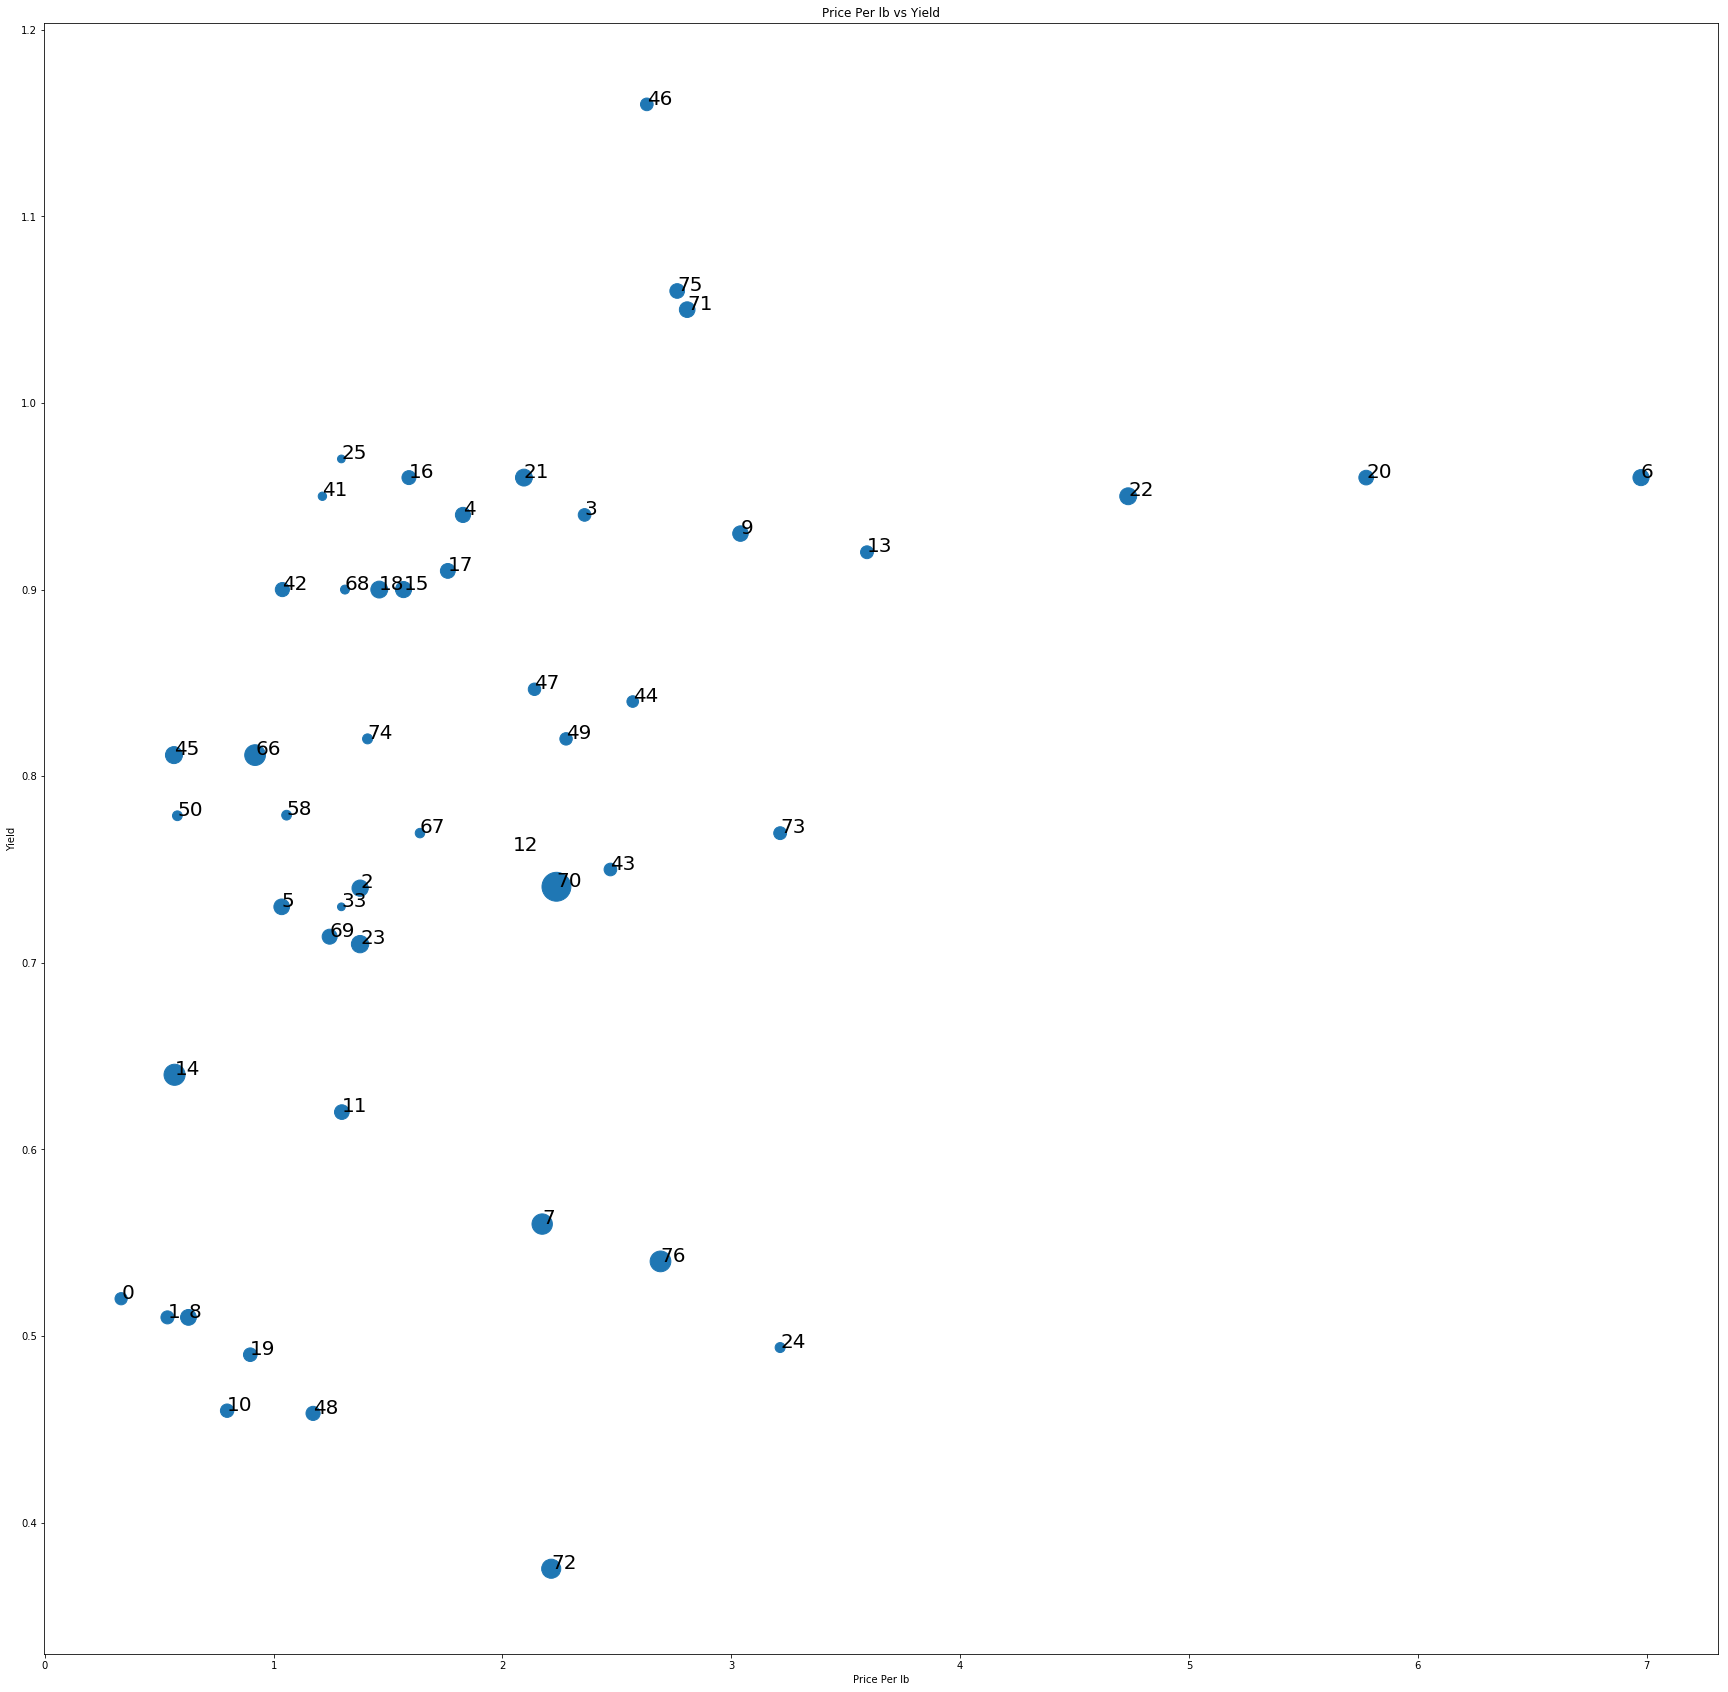

In [65]:
%matplotlib inline
import matplotlib.pyplot as plt
x = kcal['price_per_lb']
y = kcal['yield']
z = pd.to_numeric(kcal['kcal'],errors = 'coerce')


plt.figure(figsize=(30,30))
plt.scatter(x , y , s=z*5)
plt.xlabel('Price Per lb')
plt.ylabel('Yield')
plt.title('Price Per lb vs Yield')

labels = kcal.index
for label, x, y in zip(labels, x, y):
    plt.annotate(label, xy=(x, y), size = 20,)

plt.show()

In [63]:
print(kcal.loc[70]['food'], kcal.loc[66]['food'], kcal.loc[45]['food'], kcal.loc[14]['food'])

avocados sweet_potatoes potatoes bananas


I plot the scatter plot of price per lb against the yield factor. The larger points mean the food have more calories. We see from the plot that #70 is the largest point which represents avocados. This means avocados have the highest amount of calories while the price per lb and the yield factor are about average. Furthermore #14, #45, and #66 which represent bananas, potatoes and sweet potatoes also stand out as have high calories while the prices are lower than average and the yild factors are about average. 